# Performance Test Analysis

### Setup

In [1]:
from util import *

### Load data

In [2]:
all_data = load_data("data")
max_depth_data = all_data.loc[all_data['depth'] == 6]

Loaded test cases: 
  data\base.csv
  data\it_nimo.csv
  data\it_nimo_noalloc.csv
  data\noalloc.csv
  data\turbo2.csv


In [3]:
#display(all_data)

In [4]:
#display(max_depth_data)

## Search time

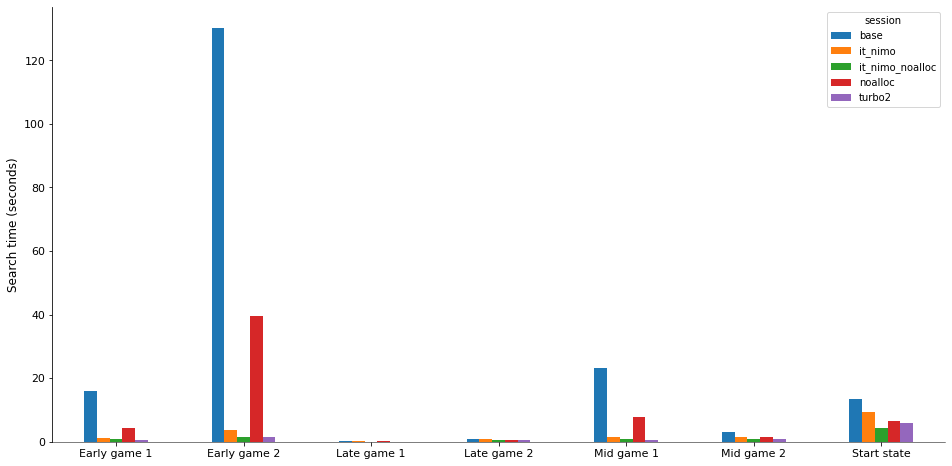

case_name,Early game 1,Early game 2,Late game 1,Late game 2,Mid game 1,Mid game 2,Start state
session,,,,,,,
base,15.85,130.27,0.28,0.95,23.36,3.11,13.41
it_nimo,1.28,3.74,0.10,0.81,1.51,1.56,9.23
it_nimo_noalloc,0.78,1.53,0.07,0.52,0.79,0.97,4.46
noalloc,4.28,39.62,0.13,0.55,7.71,1.36,6.44
turbo2,0.52,1.55,0.09,0.43,0.60,1.02,5.79


In [5]:
bar_chart(max_depth_data.pivot('case_name','session', 'time'), ylabel="Search time (seconds)") 
display(max_depth_data.pivot('session','case_name','time'))

## Nodes visited

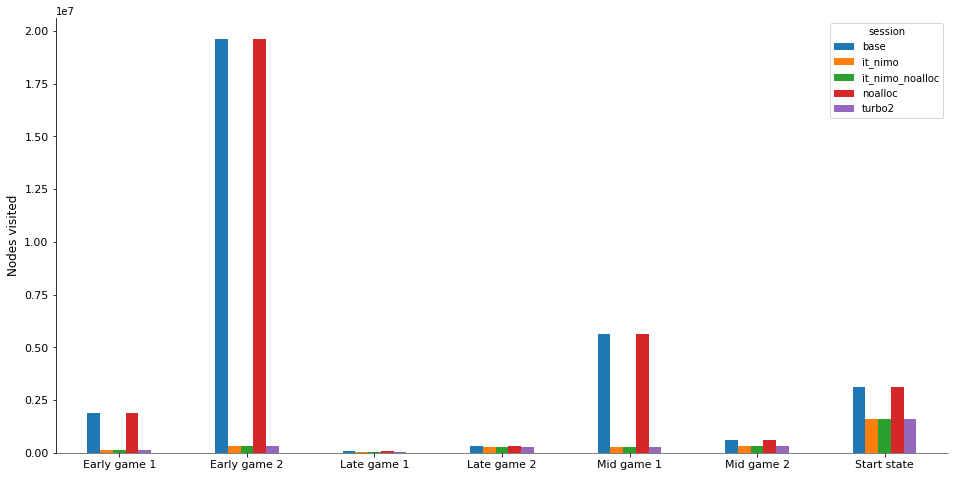

case_name,Early game 1,Early game 2,Late game 1,Late game 2,Mid game 1,Mid game 2,Start state
session,,,,,,,
base,1882719,19632972,85467,325669,5627462,609601,3135482
it_nimo,147491,322207,27669,275981,253131,307714,1616463
it_nimo_noalloc,147491,322207,27669,275981,253131,307714,1616463
noalloc,1882719,19632972,85467,325669,5627462,609601,3135482
turbo2,148015,332132,28055,276190,253388,308139,1616464


In [6]:
bar_chart(max_depth_data.pivot('case_name','session', 'nodes'), ylabel="Nodes visited")
display(max_depth_data.pivot('session','case_name','nodes'))

## Branching factor

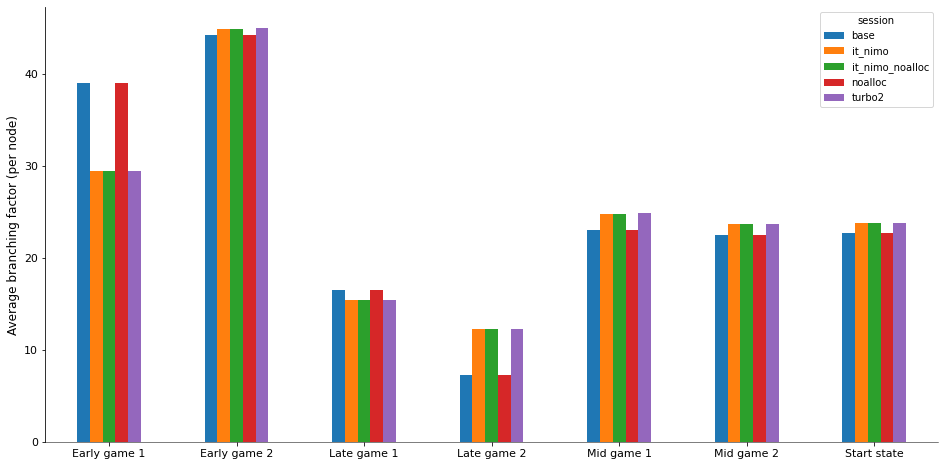

case_name,Early game 1,Early game 2,Late game 1,Late game 2,Mid game 1,Mid game 2,Start state
session,,,,,,,
base,39.00,44.29,16.47,7.30,23.04,22.52,22.70
it_nimo,29.47,44.86,15.47,12.24,24.82,23.71,23.84
it_nimo_noalloc,29.47,44.86,15.47,12.24,24.82,23.71,23.84
noalloc,39.00,44.29,16.47,7.30,23.04,22.52,22.70
turbo2,29.51,45.06,15.44,12.26,24.85,23.71,23.84


In [7]:
bar_chart(max_depth_data.pivot('case_name','session', 'branching'), ylabel="Average branching factor (per node)")
display(max_depth_data.pivot('session','case_name','branching'))

## Cutoff factor

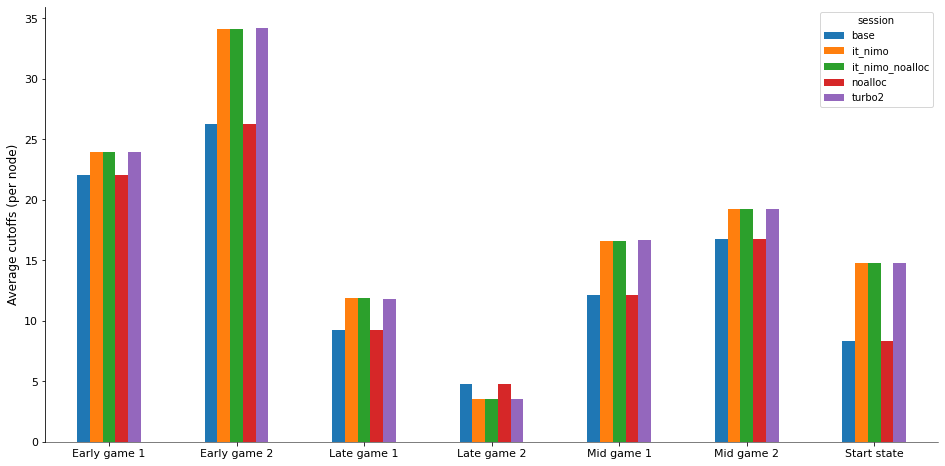

case_name,Early game 1,Early game 2,Late game 1,Late game 2,Mid game 1,Mid game 2,Start state
session,,,,,,,
base,22.05,26.24,9.22,4.80,12.11,16.77,8.36
it_nimo,23.92,34.11,11.86,3.50,16.64,19.28,14.78
it_nimo_noalloc,23.92,34.11,11.86,3.50,16.64,19.28,14.78
noalloc,22.05,26.24,9.22,4.80,12.11,16.77,8.36
turbo2,23.96,34.24,11.79,3.52,16.68,19.28,14.78


In [8]:
bar_chart(max_depth_data.pivot('case_name','session', 'cutoffs'), ylabel="Average cutoffs (per node)")
display(max_depth_data.pivot('session','case_name','cutoffs'))

## Dynamic Allocations

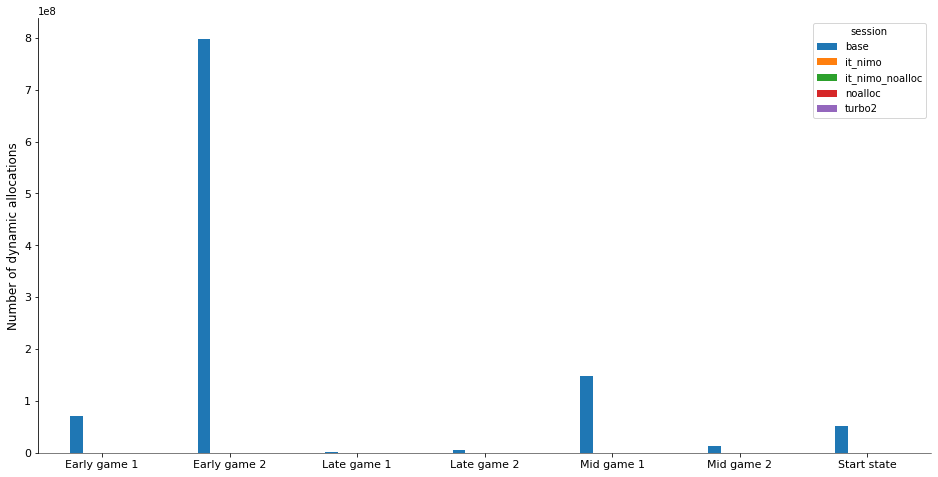

case_name,Early game 1,Early game 2,Late game 1,Late game 2,Mid game 1,Mid game 2,Start state
session,,,,,,,
base,71427748.0,798617032.0,1221580.0,4548262.0,148315600.0,12730236.0,52330673.0
it_nimo,NaN,NaN,NaN,NaN,NaN,NaN,NaN
it_nimo_noalloc,0.0,0.0,0.0,0.0,0.0,0.0,0.0
noalloc,0.0,0.0,0.0,0.0,0.0,0.0,0.0
turbo2,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
bar_chart(max_depth_data.pivot('case_name','session', 'dynamic_allocs'), ylabel="Number of dynamic allocations")
display(max_depth_data.pivot('session','case_name','dynamic_allocs'))

## Visited nodes per depth

__Note__: This is not the number of visited nodes on each depth, but the number of nodes visited when you do a search to the given depth.

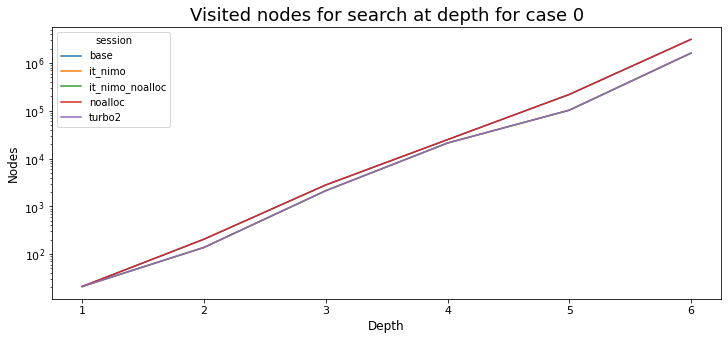

depth,1,2,3,4,5,6
session,,,,,,
base,21,205,2802,24888,220160,3135482
it_nimo,21,138,2126,21153,103048,1616463
it_nimo_noalloc,21,138,2126,21153,103048,1616463
noalloc,21,205,2802,24888,220160,3135482
turbo2,21,138,2126,21153,103048,1616464


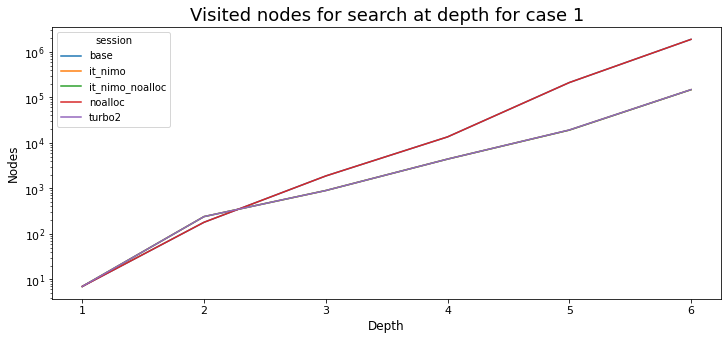

depth,1,2,3,4,5,6
session,,,,,,
base,7,180,1875,13531,211492,1882719
it_nimo,7,240,897,4400,19091,147491
it_nimo_noalloc,7,240,897,4400,19091,147491
noalloc,7,180,1875,13531,211492,1882719
turbo2,7,240,897,4400,19209,148015


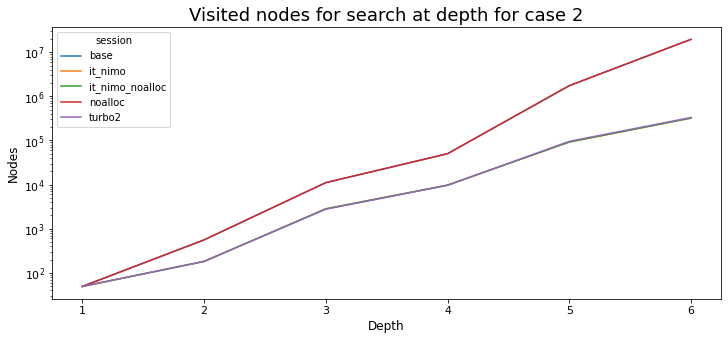

depth,1,2,3,4,5,6
session,,,,,,
base,49,556,11074,50063,1749425,19632972
it_nimo,49,181,2819,9712,92307,322207
it_nimo_noalloc,49,181,2819,9712,92307,322207
noalloc,49,556,11074,50063,1749425,19632972
turbo2,49,181,2763,9632,95458,332132


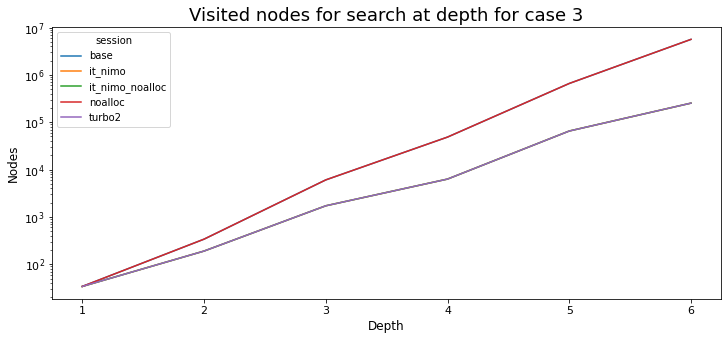

depth,1,2,3,4,5,6
session,,,,,,
base,34,339,6051,48567,658872,5627462
it_nimo,34,190,1718,6300,65255,253131
it_nimo_noalloc,34,190,1718,6300,65255,253131
noalloc,34,339,6051,48567,658872,5627462
turbo2,34,190,1718,6300,65186,253388


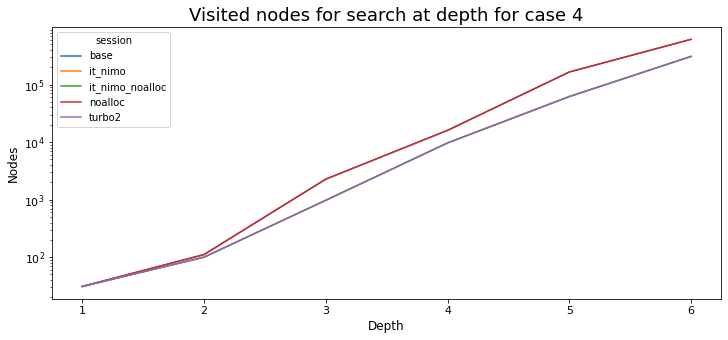

depth,1,2,3,4,5,6
session,,,,,,
base,31,111,2269,15987,164970,609601
it_nimo,31,100,975,9663,61752,307714
it_nimo_noalloc,31,100,975,9663,61752,307714
noalloc,31,111,2269,15987,164970,609601
turbo2,31,100,975,9663,61738,308139


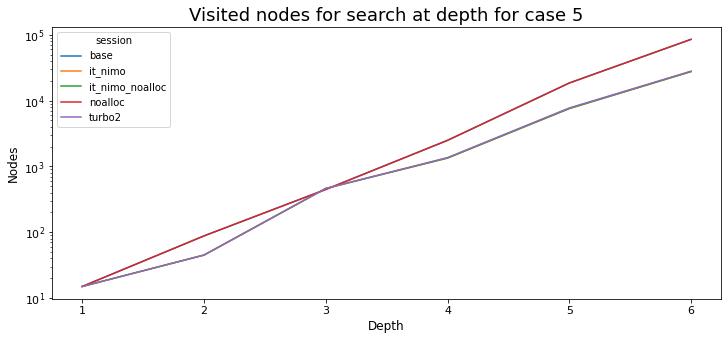

depth,1,2,3,4,5,6
session,,,,,,
base,15,88,447,2492,18544,85467
it_nimo,15,45,463,1342,7583,27669
it_nimo_noalloc,15,45,463,1342,7583,27669
noalloc,15,88,447,2492,18544,85467
turbo2,15,45,463,1363,7745,28055


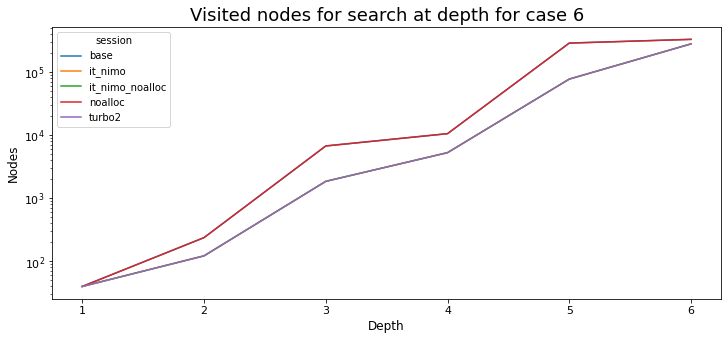

depth,1,2,3,4,5,6
session,,,,,,
base,40,237,6689,10474,284267,325669
it_nimo,40,122,1843,5243,76535,275981
it_nimo_noalloc,40,122,1843,5243,76535,275981
noalloc,40,237,6689,10474,284267,325669
turbo2,40,122,1843,5243,76619,276190


In [10]:
visited_nodes_at_depth(all_data)